# Gaussian Processes

In this notebook, we will fit a Gaussian Process (GP) on some data points.
Resources this notebook has used:
1. https://towardsdatascience.com/quick-start-to-gaussian-process-regression-36d838810319
2. https://github.com/nathan-rice/gp-python/blob/master/Gaussian%20Processes%20in%20Python.ipynb

In [71]:
import sklearn.gaussian_process as gp
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

In [72]:
x = np.linspace(0, 10, 1000)
y_sin = np.sin(x)
y_log = np.log2(x + 1)
print("Some Data Points!")
print("X: ", [x[i] for i in range(10)], "\nsin(X): ", [y_sin[i] for i in range(10)], "\nlog(X): ", [y_log[i] for i in range(10)])

Some Data Points!
X:  [0.0, 0.01001001001001001, 0.02002002002002002, 0.03003003003003003, 0.04004004004004004, 0.050050050050050046, 0.06006006006006006, 0.07007007007007007, 0.08008008008008008, 0.09009009009009009] 
sin(X):  [0.0, 0.010009842843179184, 0.020018682705473478, 0.030025516706496138, 0.04002934216684664, 0.050029156708578625, 0.06002395835563764, 0.07001274563425858, 0.0799945176733128, 0.08996827430459496] 
log(X):  [0.0, 0.014369591313938909, 0.02859746837339549, 0.042686399101550164, 0.05663907111179343, 0.07045809478484924, 0.08414600619991812, 0.09770526992807224, 0.11113828169559856, 0.1244473709244885]


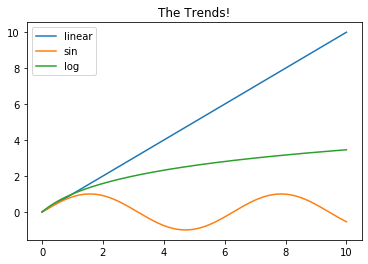

In [73]:
fig, ax = plt.subplots()

ax.plot(x, x, label="linear")
ax.plot(x, y_sin, label="sin")
ax.plot(x, y_log, label="log")
ax.set_title('The Trends!')
ax.legend();

In [74]:
# Generating some dataset to plot in the linear case.
mu, sigma = 0, 1
datapoints = np.random.normal(mu, sigma, 1000)
print("Data => ", datapoints[:10])

Data =>  [-1.37098752  0.95016639 -0.93661992 -0.22621564  1.18916758  0.30601284
  1.14387207  0.52311529  0.51269347  1.18816709]


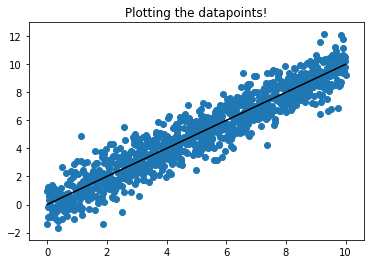

In [75]:
fig, ax = plt.subplots()

ax.plot(x, x, color="black", linestyle="-")
ax.set_title('Plotting the datapoints!')
ax.scatter(x, x + datapoints);

In [76]:
X = x.reshape(x.shape[0], 1)
Y = (x + datapoints).reshape(x.shape[0], 1)
print("X: =>", X[:5], "\nY: =>", Y[:5])

X: => [[0.        ]
 [0.01001001]
 [0.02002002]
 [0.03003003]
 [0.04004004]] 
Y: => [[-1.37098752]
 [ 0.9601764 ]
 [-0.9165999 ]
 [-0.19618561]
 [ 1.22920762]]


In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [78]:
print("XTrain => ", X_train.shape)
print("YTrain => ", y_train.shape)
print("XTest => ", X_test.shape)
print("YTest => ", y_test.shape)

XTrain =>  (670, 1)
YTrain =>  (670, 1)
XTest =>  (330, 1)
YTest =>  (330, 1)


In [79]:
kernel = gp.kernels.ConstantKernel(1.0, (1e-1, 1e3)) * gp.kernels.RBF(10.0, (1e-3, 1e3))
model = gp.GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, alpha=0.1, normalize_y=True)
model.fit(X_train, y_train)
params = model.kernel_.get_params()
print("Model Params: ", params)

Model Params:  {'k1': 2.71**2, 'k2': RBF(length_scale=0.011), 'k1__constant_value': 7.370397125696489, 'k1__constant_value_bounds': (0.1, 1000.0), 'k2__length_scale': 0.011040552105999706, 'k2__length_scale_bounds': (0.001, 1000.0)}


In [80]:
y_pred, std = model.predict(X_test, return_std=True)
MSE = ((y_pred-y_test)**2).mean()
print("MSE => ", MSE)

MSE =>  3.055506702587076


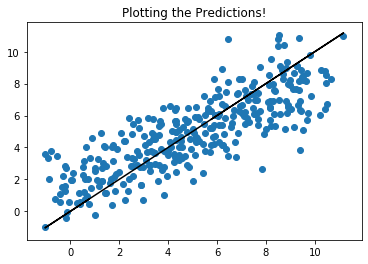

In [81]:
fig, ax = plt.subplots()

ax.plot(y_test, y_test, color="black", linestyle="-")
ax.set_title('Plotting the Predictions!')
ax.scatter(y_test, y_pred);

In [84]:
def train():
    for i in range(5):
        model.fit(X_train, y_train)
        params = model.kernel_.get_params()
        y_pred, std = model.predict(X_test, return_std=True)
        MSE = ((y_pred-y_test)**2).mean()
        print("MSE => ", MSE)
train()

MSE =>  3.0555067154603504
MSE =>  3.05550669118011
MSE =>  3.0555069921802565
MSE =>  3.0555066505064223
MSE =>  3.055506709579541
